<a href="https://colab.research.google.com/github/sristiahuja/MRM-/blob/main/Marketing_Mix_Models_Scroll_down_to_find_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk textblob vaderSentiment wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-2-8fc21ed559f7>:16: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                                                Text Sentiment  Emotion
0  I have bought several of the Vitality canned d...  Positive  neutral
1  Product arrived labeled as Jumbo Salted Peanut...  Negative  neutral
2  This is a confection that has been around a fe...  Positive  neutral
3  If you are looking for the secret ingredient i...   Neutral  neutral
4  Great taffy at a great price.  There was a wid...  Positive  neutral


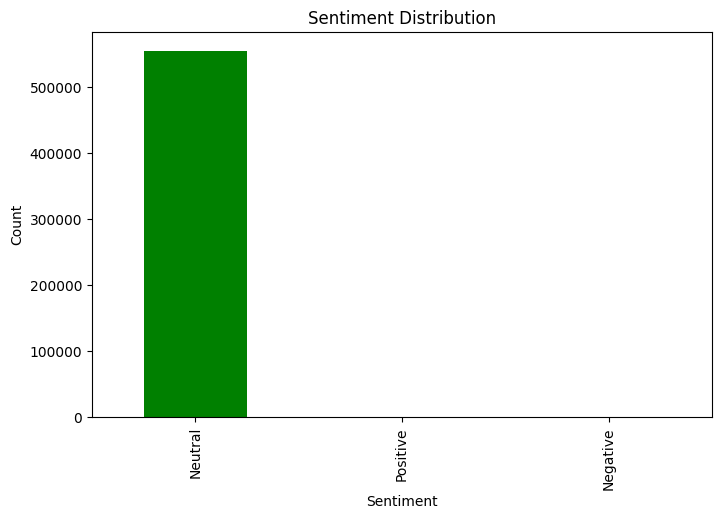

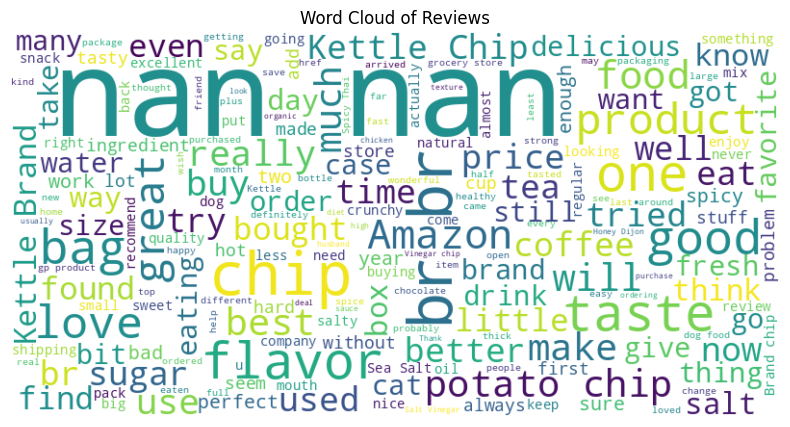

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load the dataset
file_path = "Reviews 500.csv"  # Change to your file path if needed
df = pd.read_csv(file_path)

# Ensure 'Text' column is properly formatted
df['Text'] = df['Text'].astype(str)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis
df["Sentiment_Score"] = df["Text"].apply(get_sentiment)

# Categorize sentiment polarity
df["Sentiment"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Emotion Analysis using NRC Emotion Lexicon (Manually Defined Keywords)
emotion_lexicon = {
    "joy": ["happy", "joy", "delight", "pleased", "cheerful", "excited"],
    "anger": ["angry", "furious", "rage", "annoyed", "hate"],
    "sadness": ["sad", "unhappy", "depressed", "heartbroken", "gloomy"],
    "fear": ["fear", "afraid", "scared", "frightened", "terrified"],
    "disgust": ["disgust", "dislike", "repulsed", "gross", "nauseous"],
    "surprise": ["surprised", "amazed", "shocked", "astonished"],
}

# Function to detect emotions
def detect_emotion(text):
    words = text.lower().split()
    emotions = []
    for emotion, keywords in emotion_lexicon.items():
        if any(word in words for word in keywords):
            emotions.append(emotion)
    return ", ".join(emotions) if emotions else "neutral"

# Apply emotion detection
df["Emotion"] = df["Text"].apply(detect_emotion)

# Display results
print(df[["Text", "Sentiment", "Emotion"]].head())

# Sentiment Distribution Plot
plt.figure(figsize=(8,5))
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Emotion Word Cloud
all_text = " ".join(df["Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()


In [ ]:
pip install pandas nltk openpyxl


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Load the dataset
file_path = "Reviews 500.csv"  # Change this to the correct file path
df = pd.read_csv(file_path)

# Ensure 'Text' column is properly formatted
df['Text'] = df['Text'].astype(str)

# Define NRC-based Emotion Lexicon
emotion_lexicon = {
    "joy": ["happy", "joy", "delight", "pleased", "cheerful", "excited", "content", "satisfied"],
    "anger": ["angry", "furious", "rage", "annoyed", "hate", "irritated"],
    "sadness": ["sad", "unhappy", "depressed", "heartbroken", "gloomy", "sorrow"],
    "fear": ["fear", "afraid", "scared", "frightened", "terrified", "nervous"],
    "disgust": ["disgust", "dislike", "repulsed", "gross", "nauseous"],
    "surprise": ["surprised", "amazed", "shocked", "astonished", "unexpected"],
}

# Function to detect emotions in text
def detect_emotion(text):
    words = text.lower().split()
    detected_emotions = {emotion: 0 for emotion in emotion_lexicon.keys()}  # Initialize emotions with zero
    for emotion, keywords in emotion_lexicon.items():
        detected_emotions[emotion] = sum(word in words for word in keywords)

    # Return the dominant emotion(s)
    dominant_emotions = [emotion for emotion, count in detected_emotions.items() if count > 0]
    return ", ".join(dominant_emotions) if dominant_emotions else "neutral"

# Apply emotion detection to the dataset
df["Emotion"] = df["Text"].apply(detect


SyntaxError: incomplete input (<ipython-input-4-ded16aa5c923>, line 37)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Load the dataset
file_path = "Reviews 500.csv"  # Change this to the correct file path
df = pd.read_csv(file_path)

# Ensure 'Text' column is properly formatted
df['Text'] = df['Text'].astype(str)

# Define NRC-based Emotion Lexicon
emotion_lexicon = {
    "joy": ["happy", "joy", "delight", "pleased", "cheerful", "excited", "content", "satisfied"],
    "anger": ["angry", "furious", "rage", "annoyed", "hate", "irritated"],
    "sadness": ["sad", "unhappy", "depressed", "heartbroken", "gloomy", "sorrow"],
    "fear": ["fear", "afraid", "scared", "frightened", "terrified", "nervous"],
    "disgust": ["disgust", "dislike", "repulsed", "gross", "nauseous"],
    "surprise": ["surprised", "amazed", "shocked", "astonished", "unexpected"],
}

# Function to detect emotions in text
def detect_emotion(text):
    words = text.lower().split()
    detected_emotions = {emotion: 0 for emotion in emotion_lexicon.keys()}  # Initialize emotions with zero
    for emotion, keywords in emotion_lexicon.items():
        detected_emotions[emotion] = sum(word in words for word in keywords)

    # Return the dominant emotion(s)
    dominant_emotions = [emotion for emotion, count in detected_emotions.items() if count > 0]
    return ", ".join(dominant_emotions) if dominant_emotions else "neutral"

# Apply emotion detection to the dataset
df["Emotion"] = df["Text"].apply(detect_emotion)

# Save the output to an Excel file
output_file = "Emotional_Analysis.xlsx"
df.to_excel(output_file, index=False)

print(f"Emotional analysis saved to {output_file}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-5-c8e3a16fb815>:10: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Emotional analysis saved to Emotional_Analysis.xlsx


In [ ]:
pip install pandas matplotlib prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpswlu4pph/0sh06og4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswlu4pph/uil4xzr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98017', 'data', 'file=/tmp/tmpswlu4pph/0sh06og4.json', 'init=/tmp/tmpswlu4pph/uil4xzr6.json', 'output', 'file=/tmp/tmpswlu4pph/prophet_modelztkn3ryw/prophet_model-20250205073717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


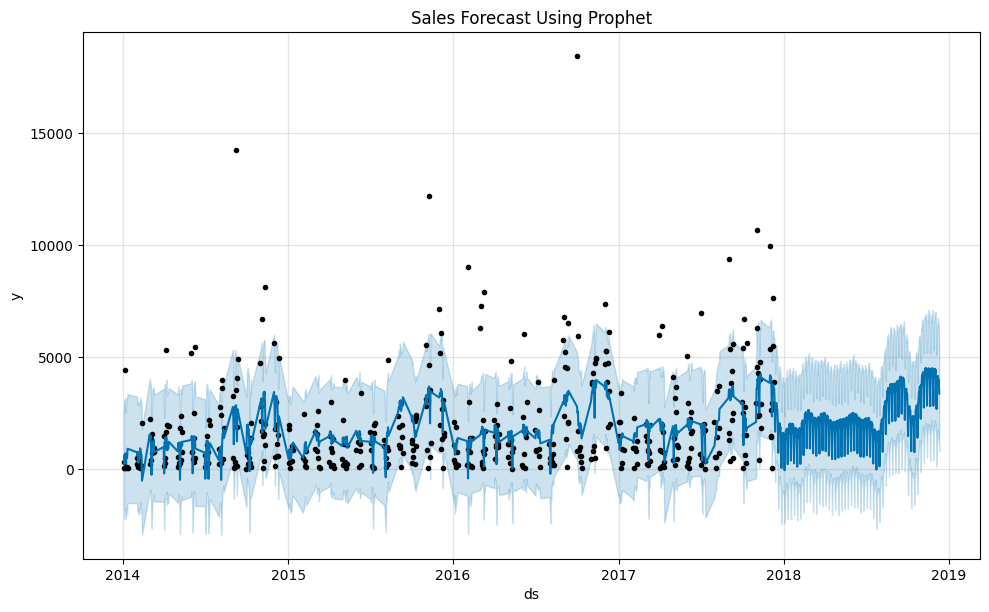

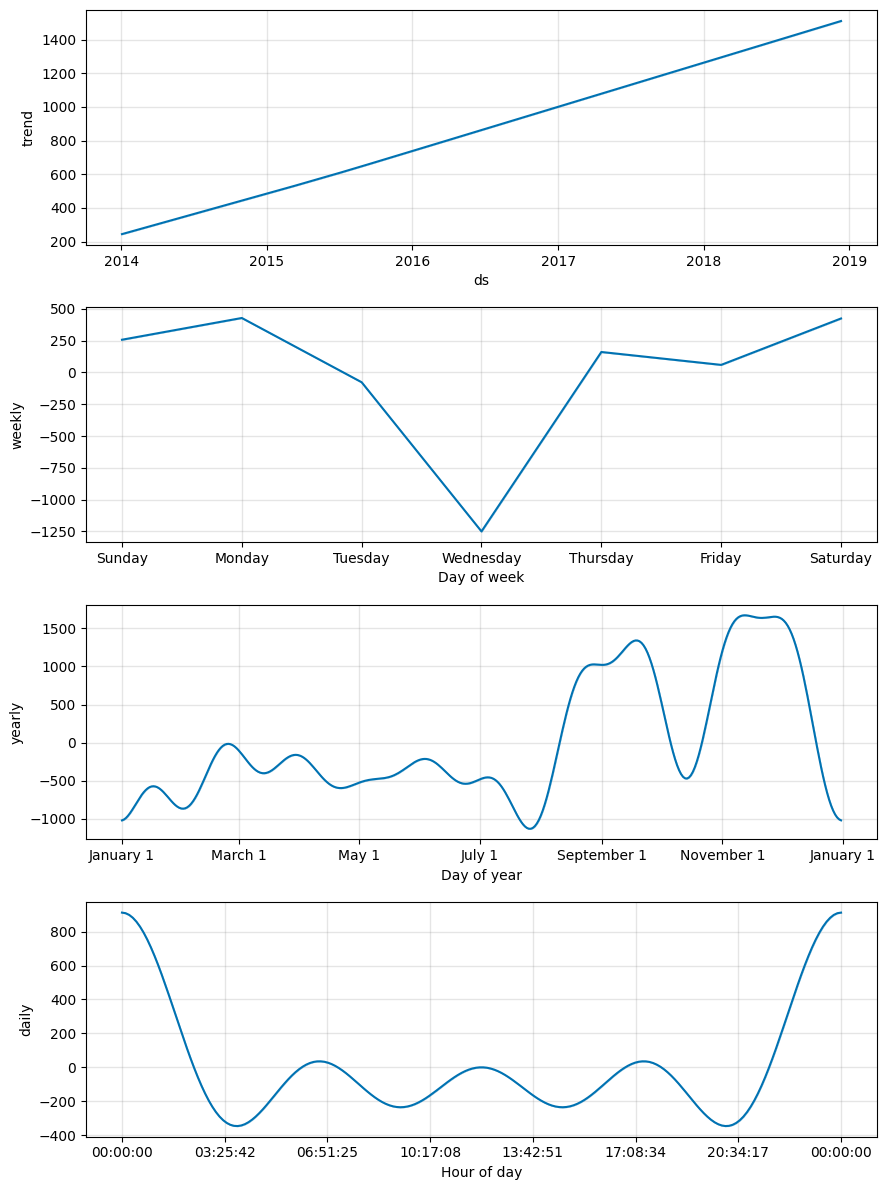

Forecast results saved to Sales_Forecast.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
file_path = "Superstore - store analysis.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Aggregate Sales by Date
df_grouped = df.groupby("Order Date")["Sales"].sum().reset_index()

# Rename columns to fit Prophet's requirements
df_grouped.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(df_grouped)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Forecast 1 year ahead
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Sales Forecast Using Prophet")
plt.show()

# Plot trend components (Yearly, Weekly, Daily)
model.plot_components(forecast)
plt.show()

# Save forecast results to an Excel file
forecast.to_excel("Sales_Forecast.xlsx", index=False)

print("Forecast results saved to Sales_Forecast.xlsx")


In [ ]:
pip install pandas numpy scipy statsmodels matplotlib


<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
<ipython-input-9-4827c212d514>:36: OptimizeWarning: Covariance of the parameters could not be estima

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     7477.
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:01:04   Log-Likelihood:                -16830.
No. Observations:                3000   AIC:                         3.367e+04
Df Residuals:                    2996   BIC:                         3.369e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TV_Spend               0.0970      0

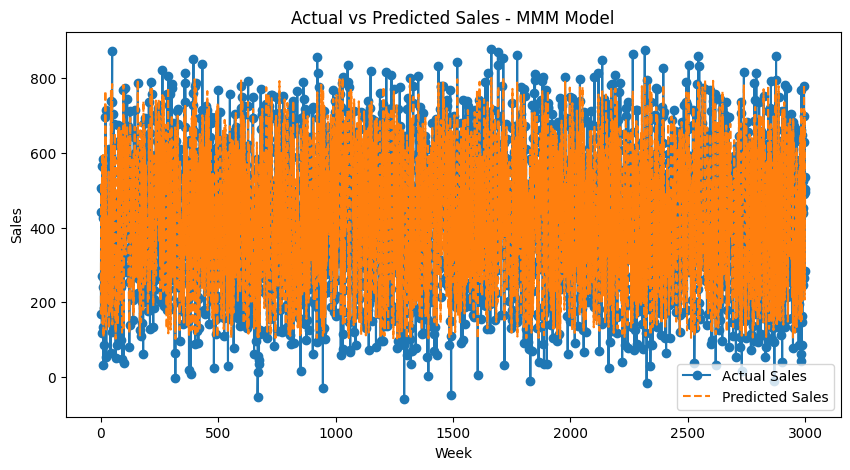

MMM model results saved to MMM_Model_Output.xlsx


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure proper data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# List of media spend channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Adstock Transformation Function (carryover effect)
def adstock(x, decay_rate=0.5):
    adstocked = np.zeros(len(x))
    for i in range(1, len(x)):
        adstocked[i] = x[i] + decay_rate * adstocked[i - 1]
    return adstocked

# Saturation Function (Diminishing Returns)
def saturation(x, alpha, beta):
    return alpha * (1 - np.exp(-beta * x))

# Apply Adstock & Saturation to Media Variables
transformed_media = pd.DataFrame()
for channel in media_channels:
    # Apply Adstock transformation
    adstocked_data = adstock(df[channel], decay_rate=0.5)

    # Fit Saturation Function
    popt, _ = curve_fit(saturation, adstocked_data, df['Sales'], maxfev=5000)
    transformed_media[channel] = saturation(adstocked_data, *popt)

# Add control variables (Price, Promotion)
transformed_media['Price'] = df['Price']
transformed_media['Promotion'] = df['Promotion']
transformed_media['Intercept'] = 1  # Required for regression

# Fit Regression Model (OLS)
X = transformed_media
y = df['Sales']
model = sm.OLS(y, X).fit()

# Print Model Summary
print(model.summary())

# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 5))
plt.plot(df['Week'], y, label="Actual Sales", marker="o")
plt.plot(df['Week'], model.predict(X), label="Predicted Sales", linestyle="dashed")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.legend()
plt.title("Actual vs Predicted Sales - MMM Model")
plt.show()

# Save Model Output
df_output = df[['Week', 'Sales']].copy()
df_output['Predicted Sales'] = model.predict(X)
df_output.to_excel("MMM_Model_Output.xlsx", index=False)

print("MMM model results saved to MMM_Model_Output.xlsx")


In [ ]:
pip install pandas numpy scipy matplotlib seaborn


Optimized Budget Allocation:
              Channel  Optimized_Spend
0            TV_Spend      2749.519377
1         Radio_Spend      2724.417289
2         Print_Spend      2693.264223
3        Search_Spend      2761.607407
4       YouTube_Spend      2743.897970
5  Social Media_Spend      2768.482468


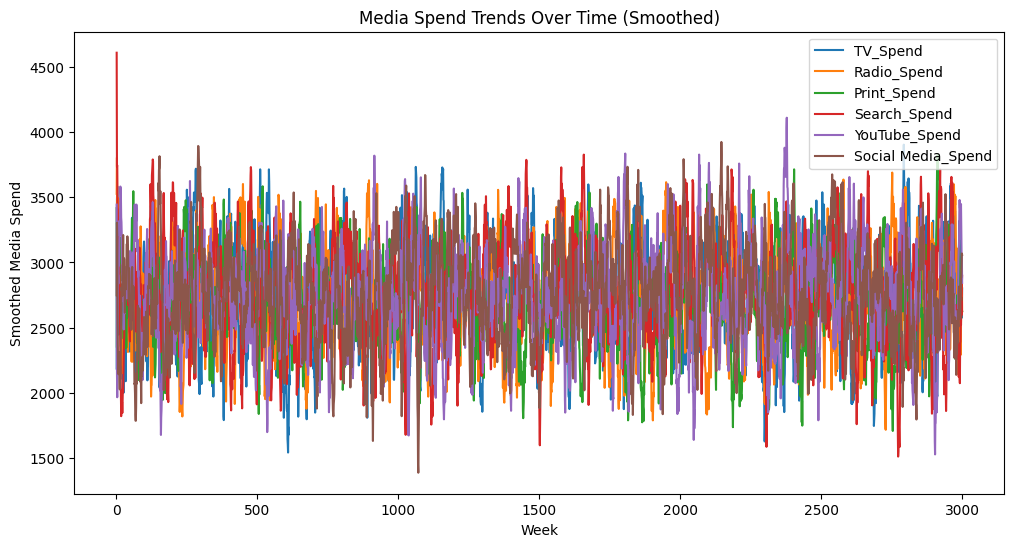

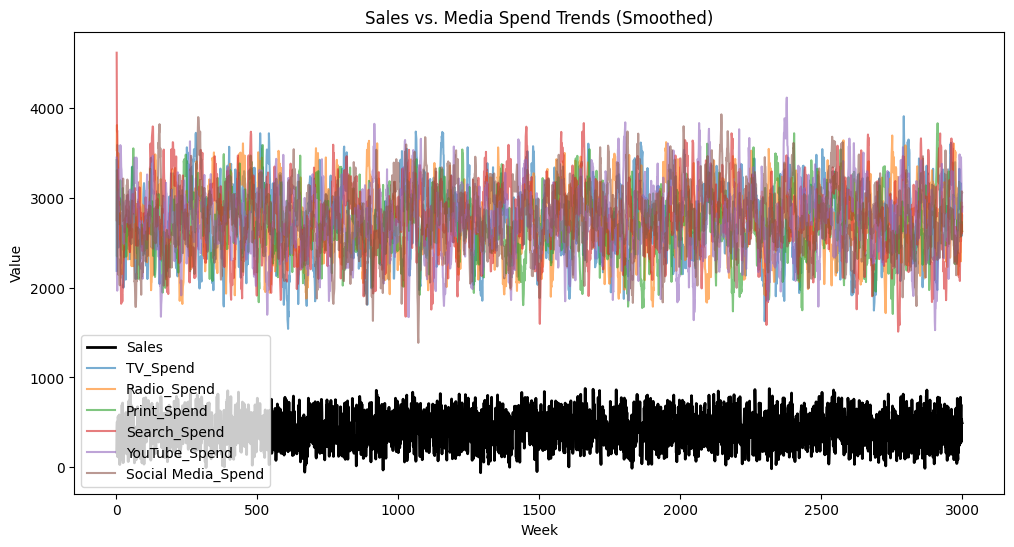

Optimization complete. Results saved to 'Optimized_Budget_Allocation.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Define initial budget allocation (equal split)
initial_budget = np.array([df[channel].mean() for channel in media_channels])

# Define constraints (total budget remains constant)
total_budget = initial_budget.sum()

# Define Objective Function (maximize sales)
def objective_function(budget):
    sales = df['Sales'].mean() + sum(budget * 0.2)  # Simplified ROI model
    return -sales  # Negative because we are maximizing

# Define Constraints (Total Budget Fixed)
constraints = ({'type': 'eq', 'fun': lambda x: total_budget - sum(x)})

# Define Bounds (Each media channel spends within 50%-150% of its mean)
bounds = [(0.5 * i, 1.5 * i) for i in initial_budget]

# Run Optimization
result = minimize(objective_function, initial_budget, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract Optimized Budget Allocation
optimized_budget = result.x
optimized_allocation = pd.DataFrame({"Channel": media_channels, "Optimized_Spend": optimized_budget})

# Print Results
print("Optimized Budget Allocation:")
print(optimized_allocation)

# Save to Excel
optimized_allocation.to_excel("Optimized_Budget_Allocation.xlsx", index=False)

# --- 📊 Data Decompression & Visualization ---

# Apply Rolling Mean to Smooth Data (Decompression)
df_smoothed = df.copy()
for channel in media_channels:
    df_smoothed[channel] = df[channel].rolling(window=12, min_periods=1).mean()

# 📈 Visualization: Media Spend Over Time
plt.figure(figsize=(12, 6))
for channel in media_channels:
    plt.plot(df['Week'], df_smoothed[channel], label=channel)
plt.xlabel("Week")
plt.ylabel("Smoothed Media Spend")
plt.title("Media Spend Trends Over Time (Smoothed)")
plt.legend()
plt.show()

# 📉 Visualization: Sales vs. Optimized Media Spend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_smoothed, x='Week', y='Sales', label="Sales", color="black", linewidth=2)
for channel in media_channels:
    sns.lineplot(data=df_smoothed, x='Week', y=channel, label=channel, alpha=0.6)
plt.title("Sales vs. Media Spend Trends (Smoothed)")
plt.xlabel("Week")
plt.ylabel("Value")
plt.legend()
plt.show()

print("Optimization complete. Results saved to 'Optimized_Budget_Allocation.xlsx'.")


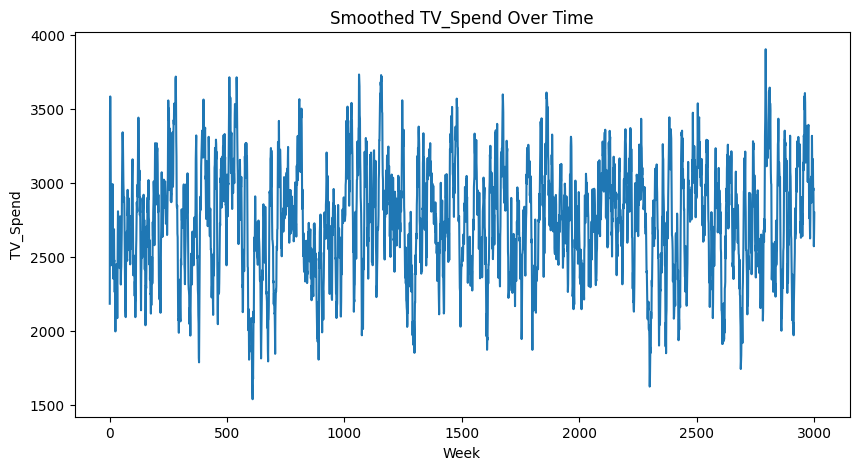

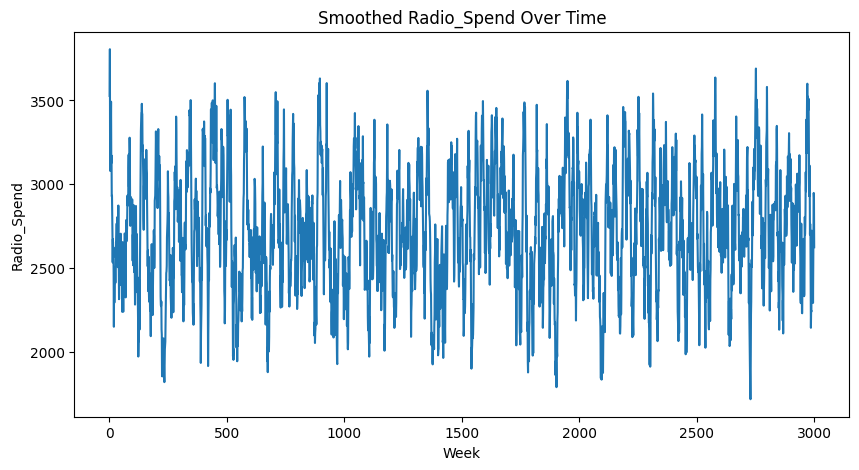

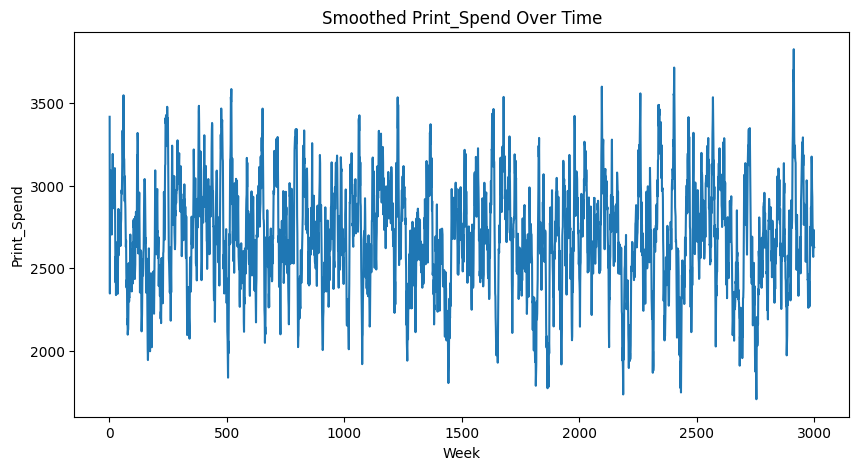

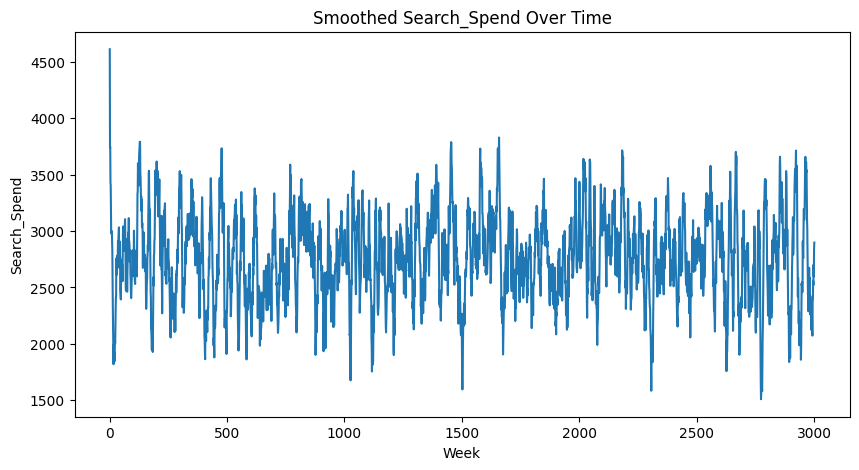

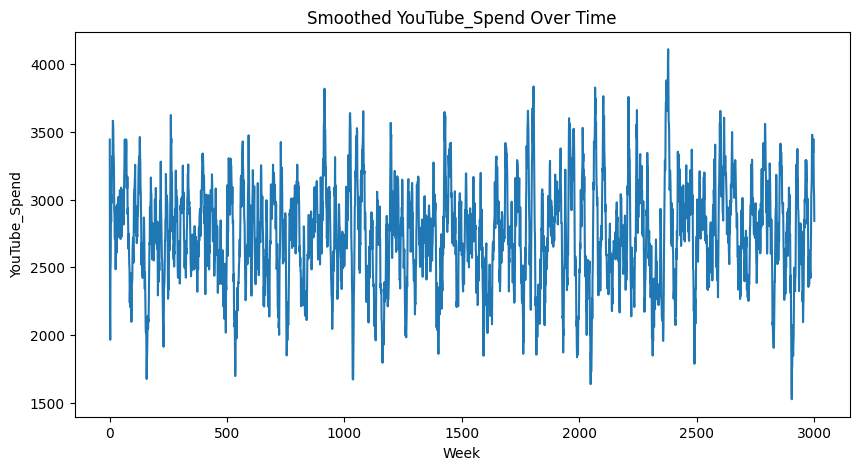

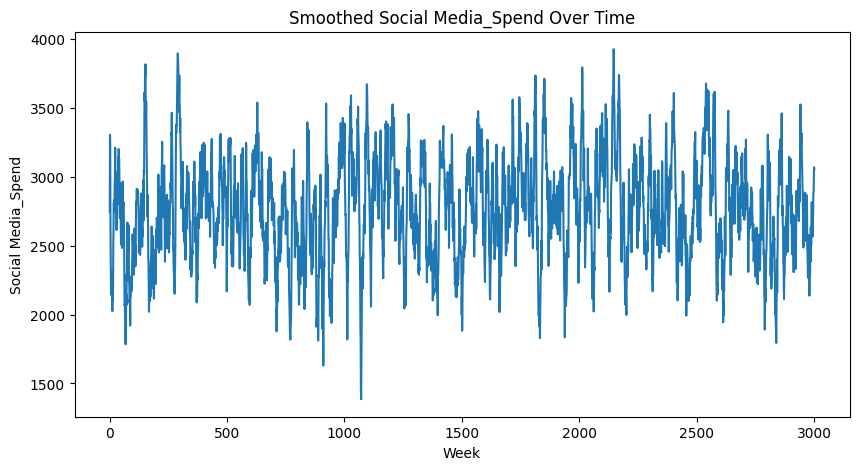

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Apply Rolling Mean to Smooth Data (Decompression)
df_smoothed = df.copy()
for channel in media_channels:
    df_smoothed[channel] = df[channel].rolling(window=12, min_periods=1).mean()

# Generate Individual Graphs for Each Media Channel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Apply Rolling Mean to Smooth Data (Decompression)
df_smoothed = df.copy()
for channel in media_channels:
    df_smoothed[channel] = df[channel].rolling(window=12, min_periods=1).mean()

# Generate Individual Graphs for Each Media Channel
for channel in media_channels:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_smoothed, x='Week', y=channel)
    plt.title(f'Smoothed {channel} Over Time')
    plt.xlabel('Week')
    plt.ylabel(channel)
    plt.show()

In [ ]:
pip install pandas matplotlib seaborn


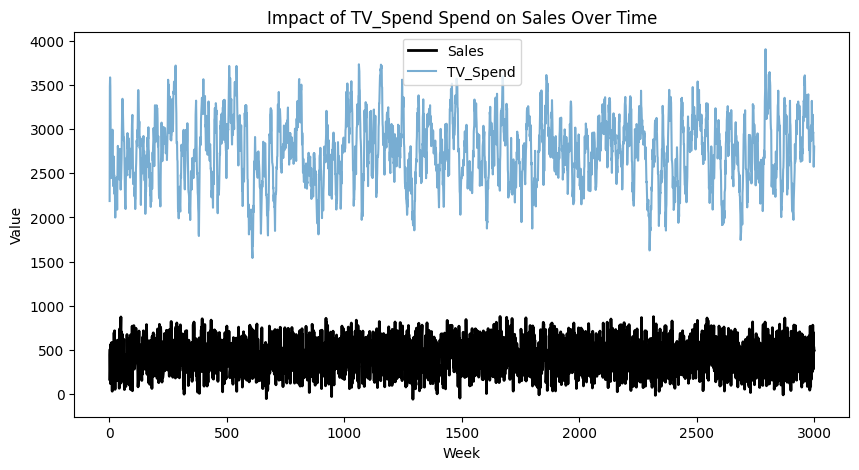

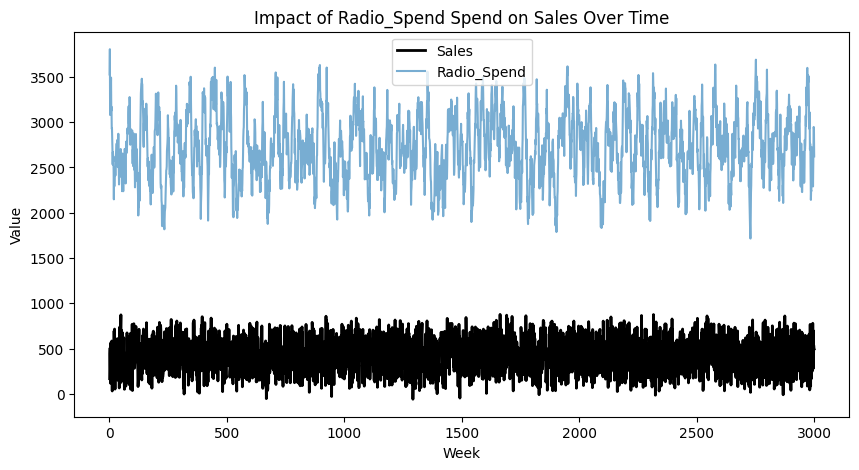

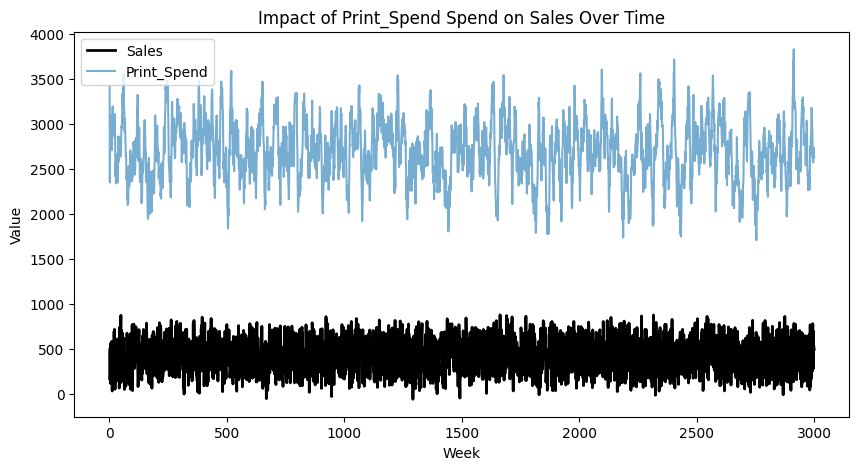

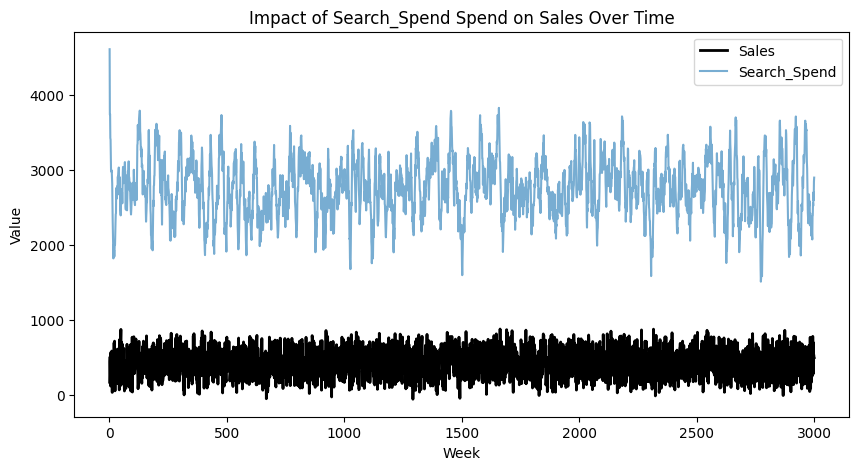

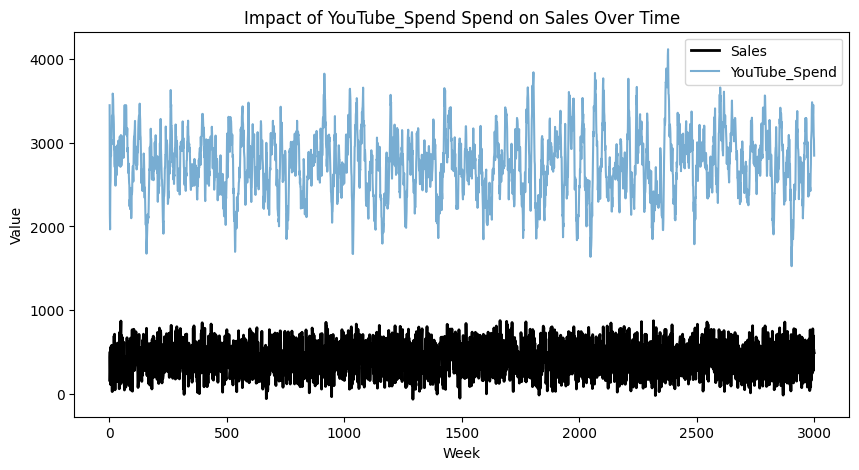

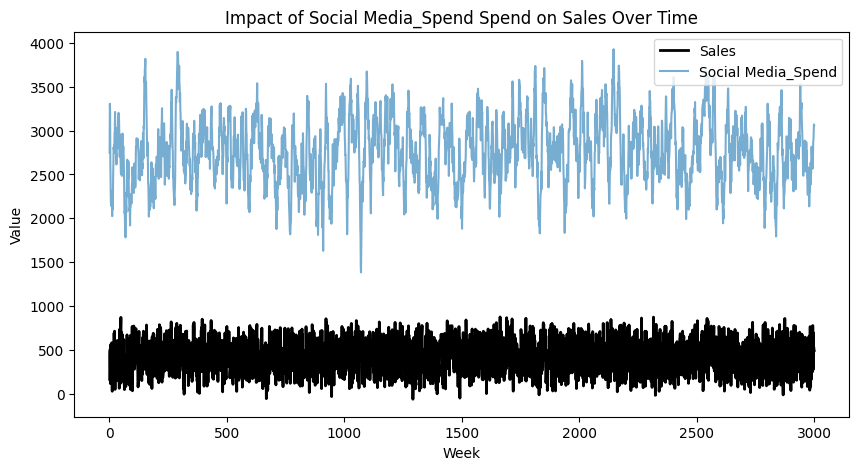

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Apply Rolling Mean to Smooth Data (Decompression)
df_smoothed = df.copy()
for channel in media_channels:
    df_smoothed[channel] = df[channel].rolling(window=12, min_periods=1).mean()

# Generate Graphs: Sales vs Individual Media Spend Over Time
for channel in media_channels:
    plt.figure(figsize=(10, 5))

    # Plot Sales
    sns.lineplot(data=df_smoothed, x='Week', y='Sales', label="Sales", color="black", linewidth=2)

    # Plot Media Channel Spend
    sns.lineplot(data=df_smoothed, x='Week', y=channel, label=channel, alpha=0.6)

    plt.xlabel("Week")
    plt.ylabel("Value")
    plt.title(f"Impact of {channel} Spend on Sales Over Time")
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Prepare Data for Regression
X = df[media_channels]  # Independent Variables (Media Spends)
y = df['Sales']         #


<ipython-input-19-a95b619f94af>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Impact Coefficient", y="Channel", data=coef_df, palette="viridis")


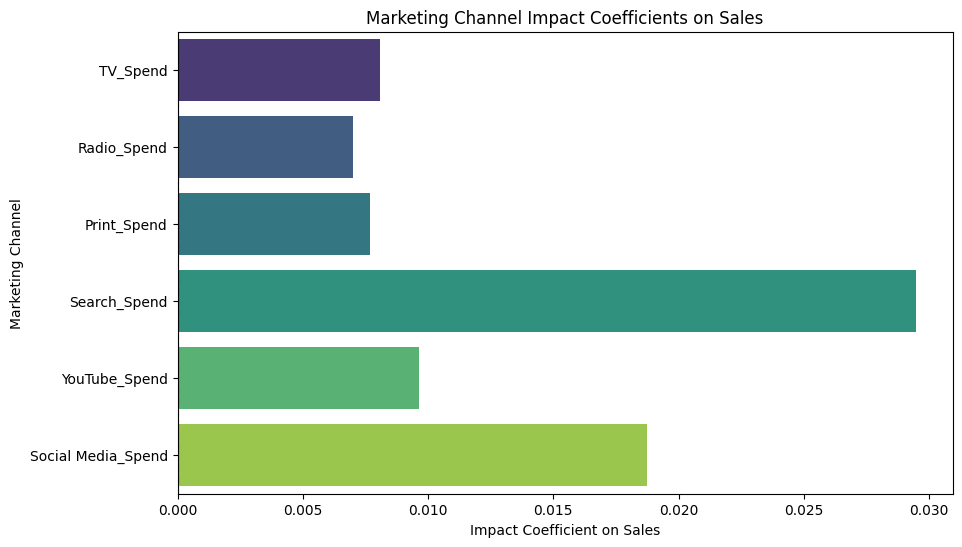

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     36.32
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.11e-42
Time:                        08:14:33   Log-Likelihood:                -19932.
No. Observations:                3000   AIC:                         3.988e+04
Df Residuals:                    2993   BIC:                         3.992e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                203.6727     17

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "MMM brand data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Ensure correct data types
df['Week'] = pd.to_numeric(df['Week'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Define media channels
media_channels = ["TV_Spend", "Radio_Spend", "Print_Spend", "Search_Spend", "YouTube_Spend", "Social Media_Spend"]

# Prepare Data for Regression
X = df[media_channels]  # Independent Variables (Media Spends)
y = df['Sales']         # Dependent Variable (Sales)
X = sm.add_constant(X)  # Add Intercept

# Run Linear Regression (OLS)
model = sm.OLS(y, X).fit()

# Extract Coefficients
coefficients = model.params[1:]  # Exclude intercept

# Convert to DataFrame for Visualization
coef_df = pd.DataFrame({'Channel': coefficients.index, 'Impact Coefficient': coefficients.values})

# Plot Impact Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Impact Coefficient", y="Channel", data=coef_df, palette="viridis")
plt.xlabel("Impact Coefficient on Sales")
plt.ylabel("Marketing Channel")
plt.title("Marketing Channel Impact Coefficients on Sales")
plt.axvline(x=0, color="black", linestyle="dashed")  # Reference Line
plt.show()

# Print Model Summary
print(model.summary())

# Save Coefficients to Excel
coef_df.to_excel("Marketing_Channel_Impact_Coefficients.xlsx", index=False)

print("Marketing channel impact coefficients saved to 'Marketing_Channel_Impact_Coefficients.xlsx'.")
